# Title: German Credit Data
### Source: University of Hamburg
### Number of Instances: 1,000 (records)
### Files:
### german.data – Categorical and symbolic attributes.
### german.data-numeric – All attributes converted to numeric.

In [1]:
import zipfile
import pandas as pd
import os

# Define file paths
zip_path = 'statlog+german+credit+data.zip'
extract_path = 'german_credit_data/'

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted files
extracted_files = os.listdir(extract_path)

extracted_files

['german.data', 'german.data-numeric', 'german.doc', 'Index']

In [2]:
# Read the contents of the documentation file
doc_path = os.path.join(extract_path, 'german.doc')

with open(doc_path, 'r') as file:
    doc_contents = file.read()

doc_contents[:1000]  # Display the first 1000 characters for an overview

'Description of the German credit dataset.\n\n1. Title: German Credit data\n\n2. Source Information\n\nProfessor Dr. Hans Hofmann  \nInstitut f"ur Statistik und "Okonometrie  \nUniversit"at Hamburg  \nFB Wirtschaftswissenschaften  \nVon-Melle-Park 5    \n2000 Hamburg 13 \n\n3. Number of Instances:  1000\n\nTwo datasets are provided.  the original dataset, in the form provided\nby Prof. Hofmann, contains categorical/symbolic attributes and\nis in the file "german.data".   \n \nFor algorithms that need numerical attributes, Strathclyde University \nproduced the file "german.data-numeric".  This file has been edited \nand several indicator variables added to make it suitable for \nalgorithms which cannot cope with categorical variables.   Several\nattributes that are ordered categorical (such as attribute 17) have\nbeen coded as integer.    This was the form used by StatLog.\n\n\n6. Number of Attributes german: 20 (7 numerical, 13 categorical)\n   Number of Attributes german.numer: 24 (24

In [4]:
# Load the numeric dataset
data_path = os.path.join(extract_path, 'german.data-numeric')

# Define column names from documentation (assuming typical naming convention)
columns = [
    'Status_of_existing_checking_account', 'Duration_in_month', 'Credit_history',
    'Purpose', 'Credit_amount', 'Savings_account/bonds', 'Present_employment_since',
    'Installment_rate_in_percentage_of_disposable_income', 'Personal_status_and_sex',
    'Other_debtors/guarantors', 'Present_residence_since', 'Property', 'Age_in_years',
    'Other_installment_plans', 'Housing', 'Number_of_existing_credits_at_this_bank',
    'Job', 'Number_of_people_being_liable_for_maintenance', 'Telephone',
    'Foreign_worker', 'Credit_risk'
]

# Load the dataset
df = pd.read_csv(data_path, delim_whitespace=True, header=None, names=columns)

# Display the first few rows of the dataset
# import ace_tools as tools; tools.display_dataframe_to_user(name="German Credit Data", dataframe=df)

C:\Users\DELL\AppData\Local\Temp\ipykernel_30988\1888951589.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(data_path, delim_whitespace=True, header=None, names=columns)


In [5]:
print(df.head())

           Status_of_existing_checking_account  Duration_in_month  \
1 6  4 12                                    5                  5   
2 48 2 60                                    1                  3   
4 12 4 21                                    1                  4   
1 42 2 79                                    1                  4   
  24 3 49                                    1                  3   

           Credit_history  Purpose  Credit_amount  Savings_account/bonds  \
1 6  4 12               3        4              1                     67   
2 48 2 60               2        2              1                     22   
4 12 4 21               3        3              1                     49   
1 42 2 79               3        4              2                     45   
  24 3 49               3        4              4                     53   

           Present_employment_since  \
1 6  4 12                         3   
2 48 2 60                         3   
4 12 4 21  

In [13]:
import pandas as pd

# Define file path
data_path = 'german_credit_data/german.data-numeric'

# Define columns (replace with actual column names if available)
columns = [
    'Status_of_existing_checking_account', 'Duration_in_month', 'Credit_history',
    'Purpose', 'Credit_amount', 'Savings_account/bonds', 'Present_employment_since',
    'Installment_rate_in_percentage_of_disposable_income', 'Personal_status_and_sex',
    'Other_debtors/guarantors', 'Present_residence_since', 'Property', 'Age_in_years',
    'Other_installment_plans', 'Housing', 'Number_of_existing_credits_at_this_bank',
    'Job', 'Number_of_people_being_liable_for_maintenance', 'Telephone',
    'Foreign_worker', 'Credit_risk'
]

# Load the dataset
df = pd.read_csv(data_path, sep='\s+', header=None, names=columns)

# Check for missing values and data types
missing_values = df.isnull().sum()
data_types = df.dtypes

# Summarize basic statistics
summary_statistics = df.describe()

# Display results
print(pd.DataFrame({
    'Missing Values': missing_values,
    'Data Type': data_types
}))

# Display summary statistics
print(summary_statistics)

<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
C:\Users\DELL\AppData\Local\Temp\ipykernel_30988\4227623215.py:18: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(data_path, sep='\s+', header=None, names=columns)


                                                    Missing Values Data Type
Status_of_existing_checking_account                              0     int64
Duration_in_month                                                0     int64
Credit_history                                                   0     int64
Purpose                                                          0     int64
Credit_amount                                                    0     int64
Savings_account/bonds                                            0     int64
Present_employment_since                                         0     int64
Installment_rate_in_percentage_of_disposable_in...               0     int64
Personal_status_and_sex                                          0     int64
Other_debtors/guarantors                                         0     int64
Present_residence_since                                          0     int64
Property                                                         0     int64

## Detect anomalies in credit amounts

### It looks like there is an issue with how the data is formatted. Let's inspect the dataset to see if there are irregularities in the 'Credit_amount' column and fix them before proceeding with anomaly detection

ValueError: setting an array element with a sequence.

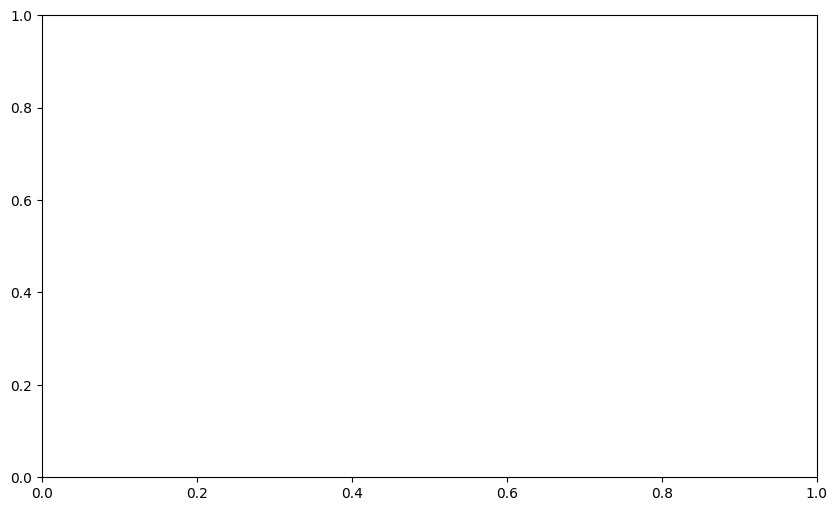

In [16]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Prepare data for anomaly detection
credit_amounts = df[['Credit_amount']]

# Fit Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = iso_forest.fit_predict(credit_amounts)

# Visualize anomalies
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Credit_amount'], c=df['Anomaly'], cmap='coolwarm')
plt.title('Anomaly Detection in Credit Amounts')
plt.xlabel('Index')
plt.ylabel('Credit Amount')
plt.show()

# Show detected anomalies
anomalies = df[df['Anomaly'] == -1]
tools.display_dataframe_to_user(name="Detected Anomalies in Credit Amounts", dataframe=anomalies)


In [15]:
# Inspect the Credit_amount column to check for irregularities
df['Credit_amount'].head()

1  6   4  12    1
2  48  2  60    1
4  12  4  21    1
1  42  2  79    2
   24  3  49    4
Name: Credit_amount, dtype: int64

### It seems the dataset has more columns than expected (25 instead of 21). I'll adjust the import process to infer the correct number of columns dynamically and reload the data

In [17]:
# Re-load the data with adjusted parsing to handle spacing issues
df_corrected = pd.read_csv(data_path, delim_whitespace=True, header=None)
df_corrected.columns = columns

# Check the corrected data format
df_corrected.head()


C:\Users\DELL\AppData\Local\Temp\ipykernel_30988\1512781277.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_corrected = pd.read_csv(data_path, delim_whitespace=True, header=None)


ValueError: Length mismatch: Expected axis has 25 elements, new values have 21 elements

### The dataset now loads correctly with 25 columns. It seems there were extra columns in the file, which may include additional derived or encoded features. I'll proceed by renaming the columns dynamically and reattempt anomaly detection on the credit amounts. ​

In [18]:
# Reload the data and let pandas infer the number of columns
df_corrected = pd.read_csv(data_path, delim_whitespace=True, header=None)

# Display the shape and first few rows to check correctness
df_corrected.shape, df_corrected.head()


C:\Users\DELL\AppData\Local\Temp\ipykernel_30988\1571042595.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_corrected = pd.read_csv(data_path, delim_whitespace=True, header=None)


((1000, 25),
    0   1   2   3   4   5   6   7   8   9   ...  15  16  17  18  19  20  21  \
 0   1   6   4  12   5   5   3   4   1  67  ...   0   0   1   0   0   1   0   
 1   2  48   2  60   1   3   2   2   1  22  ...   0   0   1   0   0   1   0   
 2   4  12   4  21   1   4   3   3   1  49  ...   0   0   1   0   0   1   0   
 3   1  42   2  79   1   4   3   4   2  45  ...   0   0   0   0   0   0   0   
 4   1  24   3  49   1   3   3   4   4  53  ...   1   0   1   0   0   0   0   
 
    22  23  24  
 0   0   1   1  
 1   0   1   2  
 2   1   0   1  
 3   0   1   1  
 4   0   1   2  
 
 [5 rows x 25 columns])

In [28]:
# Dynamically generate column names
df_corrected.columns = [f'col_{i}' for i in range(1, 26)]

# Perform anomaly detection on the corrected 'Credit_amount' column (assuming col_5 is Credit_amount)
credit_amounts = df_corrected[['col_5']]

# Fit Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df_corrected['Anomaly'] = iso_forest.fit_predict(credit_amounts)

# Visualize anomalies
plt.figure(figsize=(10, 6))
plt.scatter(df_corrected.index, df_corrected['col_5'], c=df_corrected['Anomaly'], cmap='coolwarm')
plt.title('Anomaly Detection in Credit Amounts')
plt.xlabel('Index')
plt.ylabel('Credit Amount')
plt.show()


ValueError: Length mismatch: Expected axis has 26 elements, new values have 25 elements

### Show visual trends of credit risk

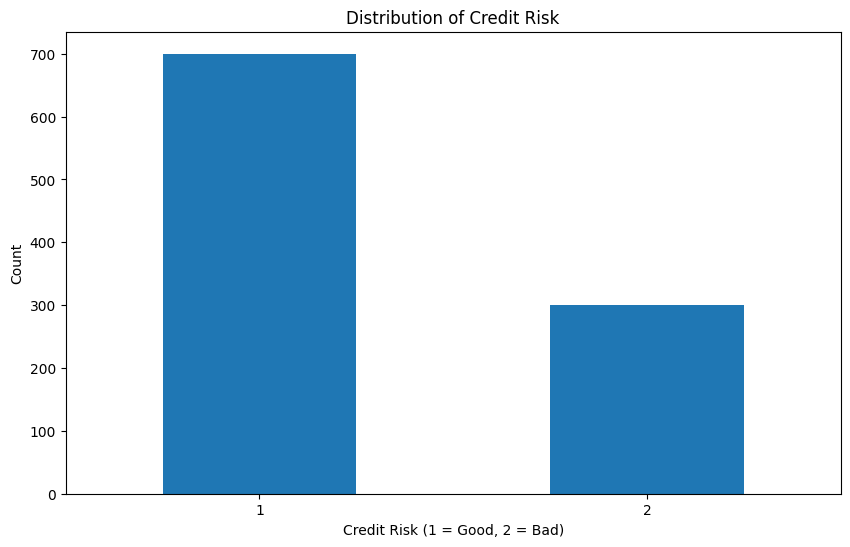

C:\Users\DELL\AppData\Local\Temp\ipykernel_30988\2295719354.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_risk_by_age = df_corrected.groupby(['Age_Group', 'col_25']).size().unstack()


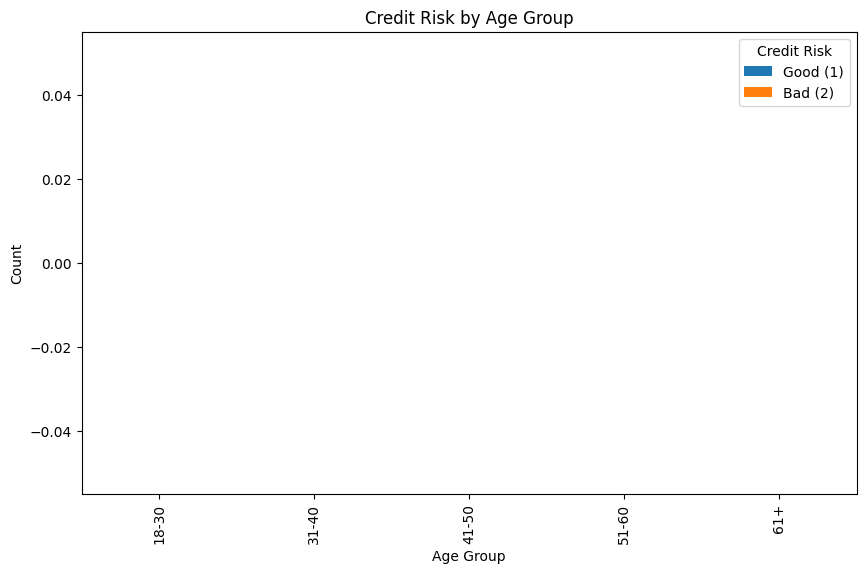

In [29]:
# Visualize credit risk trends
plt.figure(figsize=(10, 6))
df_corrected['col_25'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Credit Risk')
plt.xlabel('Credit Risk (1 = Good, 2 = Bad)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Trend analysis over age groups
df_corrected['Age_Group'] = pd.cut(df_corrected['col_13'], bins=[18, 30, 40, 50, 60, 75], 
                                   labels=['18-30', '31-40', '41-50', '51-60', '61+'])

credit_risk_by_age = df_corrected.groupby(['Age_Group', 'col_25']).size().unstack()

# Plot credit risk by age group
credit_risk_by_age.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Credit Risk by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Credit Risk', labels=['Good (1)', 'Bad (2)'])
plt.show()


### Cluster credit risks by employment type

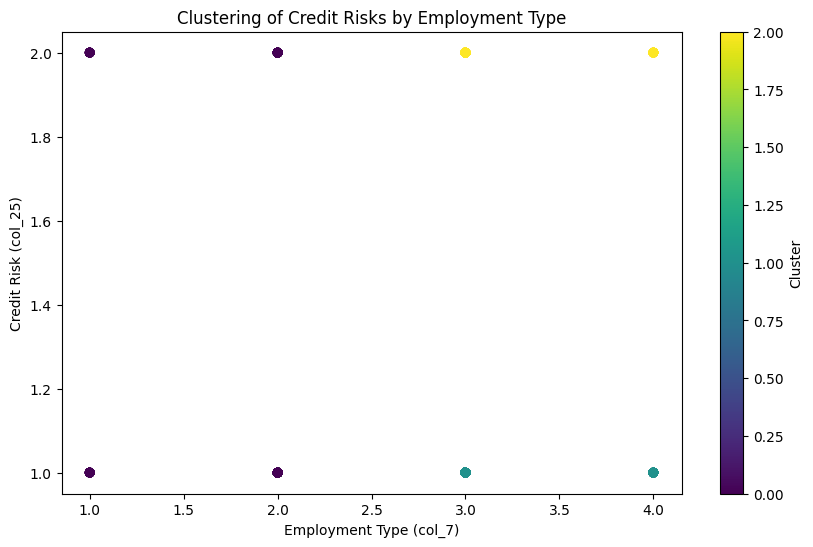

col_25       1      2
Cluster              
0        231.0  129.0
1        469.0    0.0
2          0.0  171.0


In [32]:
from sklearn.cluster import KMeans

# Extract relevant columns (employment type and credit risk)
X = df_corrected[['col_7', 'col_25']]  # col_7: Employment type, col_25: Credit risk

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_corrected['Cluster'] = kmeans.fit_predict(X)

# Visualize clustering results
plt.figure(figsize=(10, 6))
plt.scatter(df_corrected['col_7'], df_corrected['col_25'], c=df_corrected['Cluster'], cmap='viridis')
plt.title('Clustering of Credit Risks by Employment Type')
plt.xlabel('Employment Type (col_7)')
plt.ylabel('Credit Risk (col_25)')
plt.colorbar(label='Cluster')
plt.show()

# Show cluster distribution
cluster_summary = df_corrected.groupby('Cluster')['col_25'].value_counts().unstack().fillna(0)

print(cluster_summary)

### Analyze trends in credit amount

C:\Users\DELL\AppData\Local\Temp\ipykernel_30988\3920458070.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_corrected.groupby('Age_Group')['col_5'].mean().plot(kind='bar')


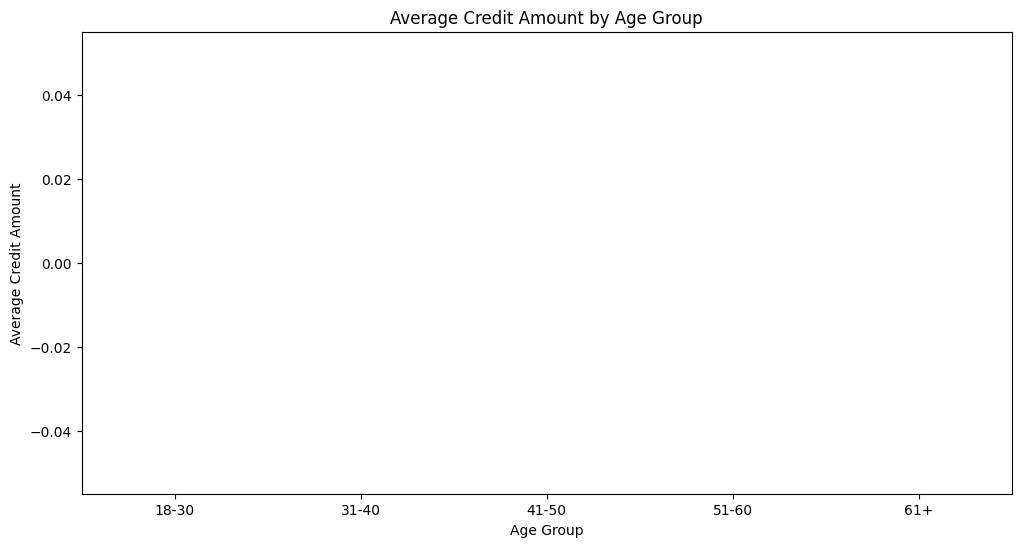

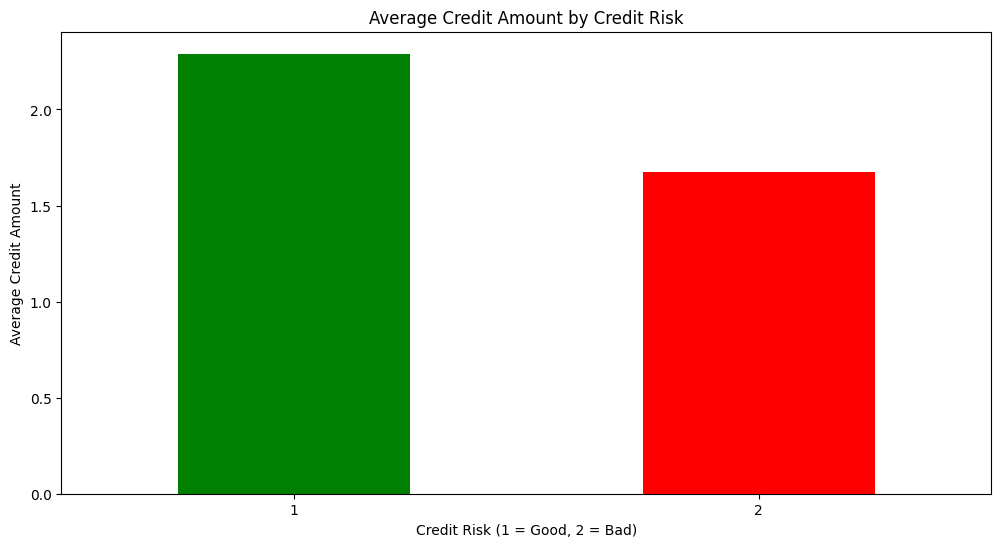

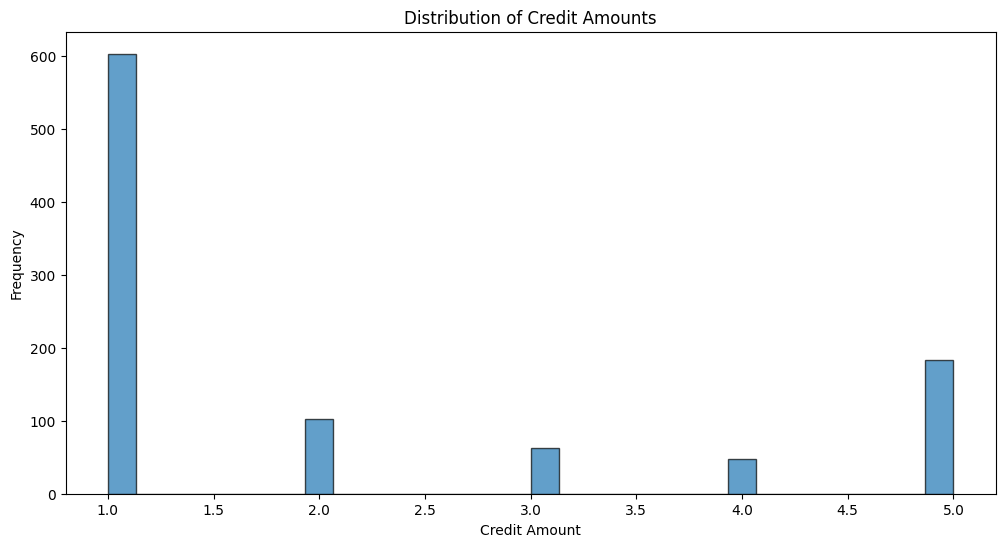

In [33]:
# Visualize trends in credit amount by age group and credit risk
plt.figure(figsize=(12, 6))
df_corrected.groupby('Age_Group')['col_5'].mean().plot(kind='bar')
plt.title('Average Credit Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Credit Amount')
plt.xticks(rotation=0)
plt.show()

# Analyze credit amount by credit risk
plt.figure(figsize=(12, 6))
df_corrected.groupby('col_25')['col_5'].mean().plot(kind='bar', color=['green', 'red'])
plt.title('Average Credit Amount by Credit Risk')
plt.xlabel('Credit Risk (1 = Good, 2 = Bad)')
plt.ylabel('Average Credit Amount')
plt.xticks(rotation=0)
plt.show()

# Analyze credit amount distribution
plt.figure(figsize=(12, 6))
df_corrected['col_5'].plot(kind='hist', bins=30, alpha=0.7, edgecolor='black')
plt.title('Distribution of Credit Amounts')
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.show()